# Introduction to TensorFlow
In this notebook will be presented my first steps with TensorFlow. After a quick presentation of how tensors work in TensorFlow, this library will be used to create simples ML algorithms.
Two linear regression models will be developped (simple and multi variables linear regressions) both with and without the utilization of TensorFlow. In that way, it's gonna be easier to check the way TensorFlow works and what are it's advantages.

It's import to note that the version of TensorFlow here is 2.0 but the version 1 will be used for the creation of the ML algorithms.
## Import the relevant libraries

In [86]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [87]:
print(tf.__version__)

2.0.0


## Definitions:

- **epoch:** It is the entire processing by the learning algorithm of the entire train-set. The number of epochs is how many times the algorithm is going to run and see the full train-set. The number of epochs affects directly (or not) the result of the training step (with just a few epochs you can reach only a local minimum, but with more epochs, you can reach a global minimum or at least a better local minimum).
- **tensor:** According to the tensorflow website, a tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes. Each tensor has a data type and a shape. There are the main object we will manipulate with TensorFlow, that will be passes through our programms. A tensor will be defined by the followings:
    - Rank: That's the dimension of the tensor (0 for scaler, 1 for vector, 2 for matrices etc...)
    - Shape: The number of elements in each dimension and the number of dimensions.
- **graph:** This is the first step when creating a model using tensorflow. A graph represents the data flow computations (the nodes and operations and how they are connected to each other).
- **session:** This is the second step in creating a model. A session is the object that evaluate, run the graph on some data. When one need to evaluate a tensor, one must create a "session" since tensors represents a partially complete computation.

## Basics of tensors with TensorFlow 2.0
### Building tensors

In [88]:
# These are 0-Dimensional tensors, hence scalers
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(42, tf.int16)
float_number = tf.Variable(3.14, tf.float32)

# This is 1-Dimensional tensor, hence, a vector
string_1D = tf.Variable(['This is a string','This is another string'], tf.string)

# This is a 2-Dimensional tensor, hence, a matrice (2*2)
string_2D = tf.Variable([['string11','string12'],['string21','string22']])

# Etc...
# We also refer to 1D tensors as "rank1_tensors" and 2D tensors as "rank2_tensors"

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [89]:
string

<tf.Variable 'Variable:0' shape=() dtype=string>

In [90]:
string_1D

<tf.Variable 'Variable_3:0' shape=(2,) dtype=string>

In [91]:
tf.rank(string_2D)

<tf.Tensor 'Rank:0' shape=() dtype=int32>

The "numpy=2" means that this is a rank2 tensor, hence, a matrix. We still can access the shape of a tensor using the .shape

In [92]:
string_2D.shape

TensorShape([Dimension(2), Dimension(2)])

### Reshaping tensors

In [93]:
tensor1 = tf.ones([12]) #This is a vector full of one
print(tensor1)
print("the rank is " + str(tf.rank(tensor1)))

Tensor("ones:0", shape=(12,), dtype=float32)
the rank is Tensor("Rank_1:0", shape=(), dtype=int32)


In [94]:
tensor2 = tf.ones([6,2]) #This is a matrix full on one, with 5 rows and 2 columns
print(tensor2)

Tensor("ones_1:0", shape=(6, 2), dtype=float32)


In [95]:
tensor3 = tf.ones([3,2,2]) # This is a matrix with 3 rows, 2 columns and 2 layers in width
print(tensor3)

Tensor("ones_2:0", shape=(3, 2, 2), dtype=float32)


In [96]:
tensor4 = tf.reshape(tensor3, [6,2]) #Or with [6,-1] it works as well
print(tensor4) 

Tensor("Reshape:0", shape=(6, 2), dtype=float32)


In [97]:
tensor5 = tf.reshape(tensor2, [12])
print(tensor5)

Tensor("Reshape_1:0", shape=(12,), dtype=float32)


## Basics with TensorFlow v1

In [98]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior() 

# Build a graph.
a = tf.constant(5.0)
b = tf.constant(6.0)
c = tf.multiply(a,b)

# Launch the graph in a session.
sess = tf.Session()

# Evaluate the tensor `c`.
print(sess.run(c)) # prints 30.0

30.0


In [99]:
print(a) #Doesn't work.

Tensor("Const_1:0", shape=(), dtype=float32)


In [100]:
a = tf.ones([2,3])
b = tf.constant([[2.,2.],[3.,3.],[4.,4.]])
c = tf.matmul(a,b)

sess = tf.Session()
print("a = ", sess.run(a))
print("b = ",sess.run(b))
print("a*b = ",sess.run(c))

a =  [[1. 1. 1.]
 [1. 1. 1.]]
b =  [[2. 2.]
 [3. 3.]
 [4. 4.]]
a*b =  [[9. 9.]
 [9. 9.]]


In [101]:
print(a)
print(b)
print(c)

Tensor("ones_3:0", shape=(2, 3), dtype=float32)
Tensor("Const_3:0", shape=(3, 2), dtype=float32)
Tensor("MatMul_1:0", shape=(2, 2), dtype=float32)


# Practical utilization of TensorFlow
## Simple linear regression (without TensorFlow)
### Importing the data

In [102]:
path = "C:\\Users\\foucardguimax\\Desktop\\PortFolio\\Advertising.txt"
data = pd.read_csv(path, sep=",")
data = data.drop(['Index','TV','newspaper'], axis = 1)
print(data.head())

   radio  sales
0   37.8   22.1
1   39.3   10.4
2   45.9    9.3
3   41.3   18.5
4   10.8   12.9


We want to build a model to estimate the sales given the amount of money spent on advertisment (here on Radio)

### Making prediction

Text(0, 0.5, 'Sales')

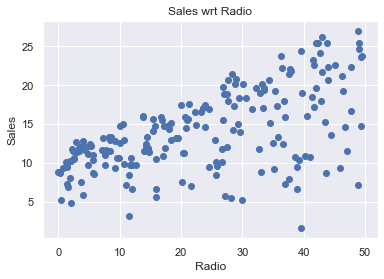

In [103]:
plt.scatter(data['radio'], data['sales'])
plt.title('Sales wrt Radio')
plt.xlabel('Radio')
plt.ylabel('Sales')

We can clearly see that there is some kind of linear patern between these two varaibles. We want to implement the following equation: predicted_sales = Radio * weight + Bias

In [104]:
def predict_sales(radio, weight, bias):
    return(weight*radio + bias)

### Cost function
Here we will use the MSE (L2) function as cost function. This function will return a score that represents the fit of our previous equation to the data. The lowest the cost function, the better our model will be.
\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^n (y_i - (mx_i + b))^2
\end{equation}

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^n (y_i - (y_{pred}))^2
\end{equation}

In [105]:
def cost_function(sales, radio, weight, bias):
    N = len(radio)
    total_error = 0.0
    
    predicted_sales = predict_sales(radio, weight, bias)
    
    for i in range(N):
        total_error += (sales[i] - predicted_sales[i])**2
    return(total_error / N)

Now we built our cost_function, we need to find a way to minimize it. To do this, we will use the gradient descent.

**Math** Here there are 2 parameters we want to estimate: the weight "m" and bias "b". To use the gradient descent on both of those, we need to calculate the partial derivatives of the cost_function for each varaible (we calculate the gradient of the cost function). Here is it:
\begin{equation}
 grad(f) = \binom{\frac{\partial f}{\partial m}}{\frac{\partial f}{\partial b}} = \binom{\frac{1}{N} \sum_{i=1}^n -2x_i(y_i - (mx_i + b))}{\frac{1}{N} \sum_{i=1}^n -2(y_i - (mx_i + b))}
 \end{equation}

In [106]:
def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    N = len(radio)
    
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*radio[i] * (sales[i] - (weight*radio[i] + bias))
        
        # -2(y - (mx + b))
        bias_deriv += -2*(sales[i] - (weight*radio[i] + bias))
    
    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / N) * learning_rate
    bias -= (bias_deriv / N ) * learning_rate
    
    return(weight, bias)

In this code we can see a new parameter: "In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function" (Wikipédia)

The gradient has to be calculated for the weights and bias for all of the samples in the dataset. The partial derivatives indicates de slope of the curve of the cost_function for the given variable at the current position. To reduce the cost_function, we move in the opposite directection of the gradient. Since the gradient always indicates the way from low values to high values (physical definition) we need to move in the opposite direction indicated by the gradient to minimize the cost_fucntion.

### Training
In this section we will improve our model (deacrese the cost function) each time we go through the whole data by updating, at the same time, the weights and bias. The training is complete when we reach the wanted error threshold or when the cost_function connot be reduced anymore.

Before strating to train our model, we need to initialize our weights and bias (those are the default values). These are new hyperparameters, such as the learning rate.

In [107]:
def train(radio, sales, weight, bias, learning_rate, iters):
    # "iters" will be the number of iteration
    cost_history = [] # We will track each values of the cost_function to see it's evolution
    weight_history, bias_history = [],[]
    
    for i in range(iters):
        weight,bias = update_weights(radio, sales, weight, bias, learning_rate)
        
        #Calculate cost for auditing purposes
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)

        weight_history.append(weight)
        bias_history.append(bias)         
            
    return weight, bias, cost_history, weight_history, bias_history, iters

In [108]:
weight, bias, cost_history, weight_history, bias_history, iters = train(data['radio'], data['sales'], 0.1, 0, 0.0001, 40)
print(weight, bias)

0.48589511754358283 0.03323958807636157


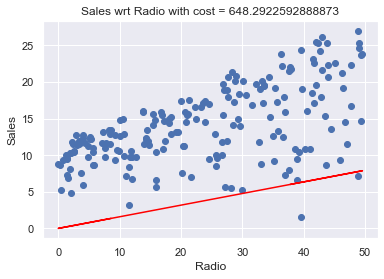

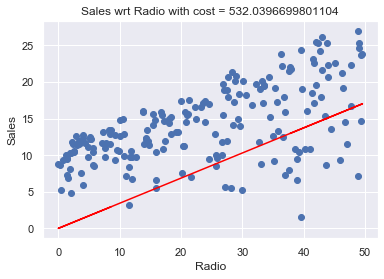

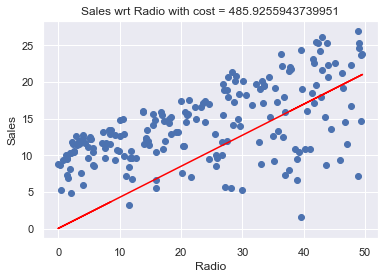

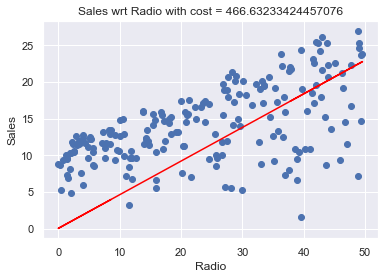

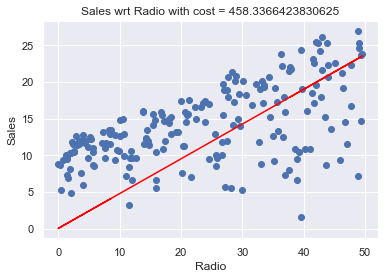

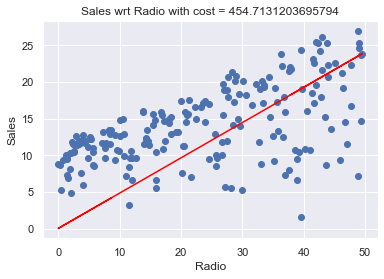

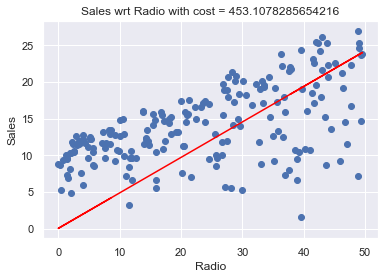

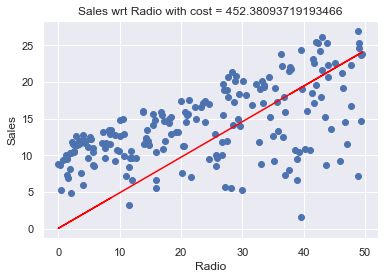

In [109]:
for i in range(0,len(weight_history),5):
    plt.figure()
    plt.scatter(data['radio'], data['sales'])
    plt.plot(data['radio'], data['radio']*weight_history[i] + bias_history[i], color = 'red')
    plt.title('Sales wrt Radio with cost = ' + str(cost_history[i]))
    plt.xlabel('Radio')
    plt.ylabel('Sales')

Text(0, 0.5, 'Value of the cost function')

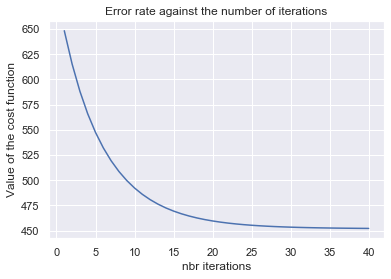

In [110]:
plt.figure()
plt.plot(np.arange(1,iters+1), cost_history)
plt.title('Error rate against the number of iterations')
plt.xlabel('nbr iterations')
plt.ylabel('Value of the cost function')

We can see with this final graph that the cost function strinclty decreases until a certain point. This means that it won't be necessary to do more iteration, the model won't be any better.

Here is the final graph with the final equation:
$ Sales = 0.48*Radio + 0.03 $

Text(0.5, 1.0, 'Linear Regression of Sales given radio')

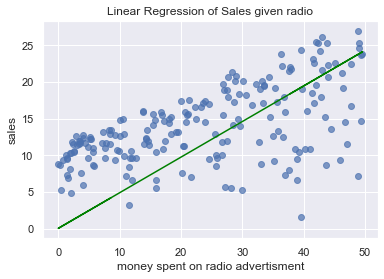

In [111]:
plt.figure()
plt.scatter(data['radio'], data['sales'], alpha = 0.7)
plt.plot(data['radio'], data['radio']*weight + bias, color = 'green')
plt.xlabel('money spent on radio advertisment')
plt.ylabel('sales')
plt.title('Linear Regression of Sales given radio')

## Simple linear Regression (with TensorFlow)
### Importing the data
Since we will use the exact same data we used previously, we don't need to do anything particular here. Just as a reminder, here is a scatter plot of the data.

Text(0.5, 1.0, 'input data set')

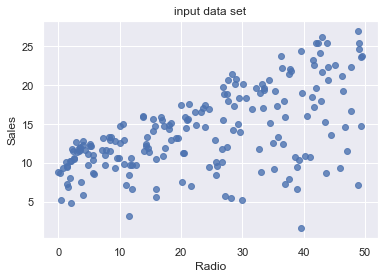

In [112]:
X = data['radio']
y = data['sales']

plt.scatter(X, y, alpha = 0.8)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('input data set')

### Load the relevant libraries
Here we will use TensorFlow v1 so we need to import it and disable TensorFlow v2.

In [115]:
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split
tf.disable_v2_behavior() 

### Train/test

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Definition of the variables needed

In [117]:
X = tf.placeholder(tf.float32) # For now placeholders are empty, they will be filled later.
y = tf.placeholder(tf.float32) # We are using placeholders rather than Variables because we need X and y to remain constant

w = tf.Variable(tf.random_uniform([1],-1.0,1.0), name='weight') # As the weights and biases need to be improved through each epochs, we need to declare them as Variables
b = tf.Variable(tf.zeros([1]), name='bias')

### Making prediction

In [118]:
pred = tf.add(tf.multiply(X,w),b) # Here we are building the prediction

### Cost function

In [119]:
cost = tf.reduce_mean(tf.square(y - pred))/(2*n_samples) # Here we create the cost function that needs to be lowered through each epoch
cost_record = [] # The cost function will be recorded here

### Optimizer

In [121]:
learning_rate = 0.0005
epochs = 20
n_samples = len(X_train)

init = tf.global_variables_initializer() # Since we have created variables, one must write this line to initialize the varialbes in the session.

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Run of the Session

epoch: 0 error:  0.5456876 weight: [0.06853164] bias: [0.00721427]


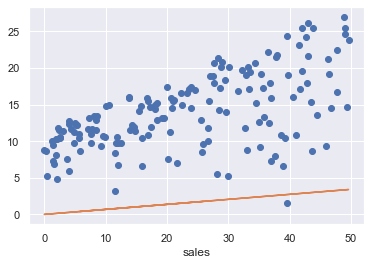

epoch: 5 error:  0.14058454 weight: [0.42351642] bias: [0.02479412]


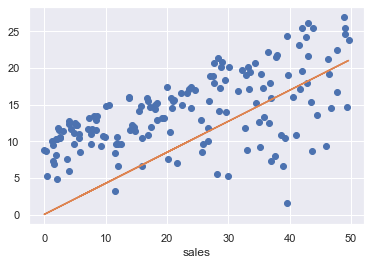

epoch: 10 error:  0.13041757 weight: [0.47810417] bias: [0.0330606]


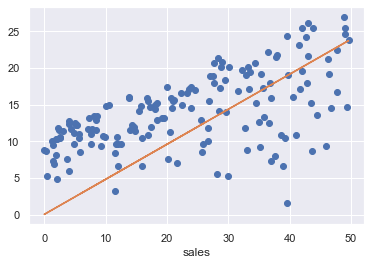

epoch: 15 error:  0.13000539 weight: [0.48635304] bias: [0.03988649]


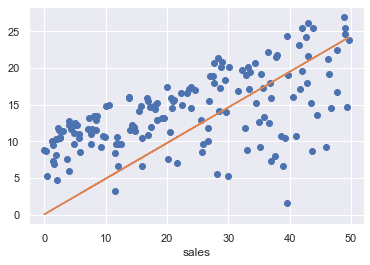

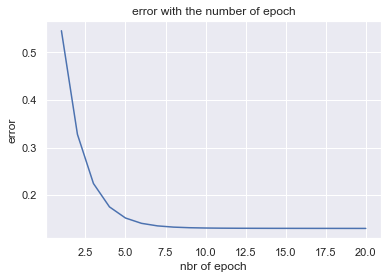

In [122]:
with tf.Session() as sesh:
    # Every operation, assignement we made earlier, will be done in the session
    sesh.run(init) # By creating a session, we create a pointer. Here that point to init and that will run it --> Here we initialize the variable
    
    for epoch in range(epochs):
        for feature, target in zip(X_train,y_train):
            sesh.run(optimizer, feed_dict={X: feature, y: target})
            # With feed_dict we put a value inside each placeholder we createed above
            # We need to do this because the session points on this optimizer which uses X and y
        cost_record.append(sesh.run(cost, feed_dict={X: X_train, y: y_train}))
        
        if epoch%5 == 0:
            c = sesh.run(cost, feed_dict={X: X_train, y: y_train})
            W = sesh.run(w)
            B = sesh.run(b)
            print('epoch: ' + str(epoch) + " error:  " + str(c) + " weight: "+ str(W) + " bias: " + str(B))
    
            plt.figure()
            plt.xlabel('radio')
            plt.xlabel('sales')
            plt.plot(X_train, y_train, 'o')
            plt.plot(X_train, W*X_train + B)
            plt.show()
    
    plt.figure()
    plt.plot(np.arange(1,len(cost_record)+1), cost_record)
    plt.title('error with the number of epoch')
    plt.xlabel('nbr of epoch')
    plt.ylabel('error')
    plt.show()

    

We can see on the last grah that with this number of epoch, we reach a plateau. The error won't decrease any further, our model is trained. We can now compare the two models:

In [123]:
data_params = np.array([[weight,bias],[W[0],B[0]]])
params = pd.DataFrame(data_params, columns=['Weights','Bias'], index=['Simple_Linear','Tensorflow'])
params

Weights      Bias
Simple_Linear  0.485895  0.033240
Tensorflow     0.486353  0.039886

According to this table, both TensorFlow and the first method gave the same results. Let's now make something more serious by creating a multi variable linear regression.

## Multivariable linear regression (without TensorFlow)
this time we will use more than one feature and again, compare two models: one using tensorflow, the other one without any machine learning package.

In [599]:
path = "C:\\Users\\foucardguimax\\Desktop\\PortFolio\\Advertising.txt"
data_full = pd.read_csv(path, sep=",")
data_full = data_full.drop('Index', axis = 1)
data_full.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [600]:
from sklearn.model_selection import train_test_split

target = data_full['sales']
features = data_full.drop('sales', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(160, 3) (40, 3)
(160,) (40,)


We still have the "sales" column that represents our target, but we now have 3 features: TV, Radio and newspaper.

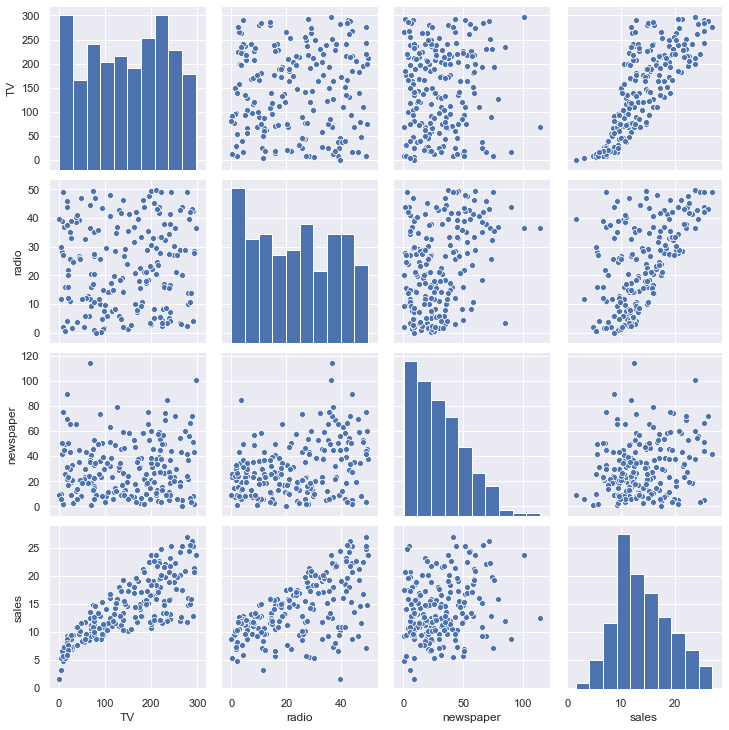

In [601]:
sns.pairplot(data_full)

We can see a lot of very interesting things on this graph. For instance we can find the previous graph of the sales with regard to the amount of money spent on radio advertisement, but also on newspaper and TV. We see that for the laters, the pattern is not as linear as it is with the radio. We also have a bench of information about the distribution of the different graphs (most companies spend a lot on TV, very few spend a lot in newspaper etc...)

## Normalization
Since we now try to build a more complex model, we need to normalize our input data so we can speed up the gradient descrent. We will build a min_max scaler here.

In [602]:
def normalize(features):
    
    df_info = pd.DataFrame(index=['mean','min','max'])
    list_info = []
    for col in features.columns:
        
        list_info.append(np.mean(features[col]))
        list_info.append(np.min(features[col]))
        list_info.append(np.max(features[col]))
        
        features[col] -= np.mean(features[col])
        features[col] /= (np.max(features[col]) - np.min(features[col]))
        
        df_info[col] = list_info
        list_info = []
    return(features, df_info)

It is also important to keep track of the modification we've made to the input data. We will need this later to normalize X_test with the same parameters we used for the X_train, hence the creation of the dataframe "df_info" that contains all the information that we need.

In [603]:
X_train, df_info = normalize(X_train)
bias = np.ones(shape=(len(X_train),1))
X_train['bias'] = bias
X_train.head()

C:\Users\foucardguimax\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\foucardguimax\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\foucardguimax\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A valu

TV     radio  newspaper  bias
79  -0.115047 -0.305960  -0.068048   1.0
197  0.091243 -0.273702  -0.234052   1.0
38  -0.361581  0.077104   0.051236   1.0
24  -0.296650 -0.207170  -0.115762   1.0
122  0.250188 -0.412815  -0.142601   1.0

In [604]:
df_info

TV      radio   newspaper
mean  150.019375  22.875625   29.945625
min     0.700000   0.000000    0.300000
max   296.400000  49.600000  100.900000

In [605]:
print(X_train.shape, X_test.shape)

(160, 4) (40, 3)


## Making prediction
What we try to do here is to predict the sales given the following equation:

\begin{equation}
Sales = W_{1}TV + W_{2}Radio + W_{3}Newspaper
\end{equation}


We will implement this using matrices:
\begin{equation}
Sales = \begin{pmatrix}
TV & Radio & Newspaper
\end{pmatrix} * \begin{pmatrix}
W_{1} \\
W_{2} \\
W_{3}
\end{pmatrix} + bias
\end{equation}

In [527]:
def predict(features, weights):
  predictions = np.dot(features, weights)
  return (predictions)

### Initialize weights and biases

In [611]:
w1 = np.random.normal( 0, 0.1)
w2 = np.random.normal( 0, 0.1)
w3 = np.random.normal( 0, 0.1)
w4 = np.random.normal( 0, 0.1)

weights = np.array([[w1],[w2],[w3],[w4]])

predictions = predict(X_train, weights)

### Cost function
We will use the same function:\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^n (y_i - (y_{pred}))^2
\end{equation}

but now the equation is the following, the math remains the same
\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^n (y_i - (w_1x_1 + w_2x_2 + w_3x3 + b))^2
\end{equation}

In [529]:
def cost_function2(features, targets, weights):
    N = len(targets)

    predictions = predict(features, weights) #(160,)
    predictions = predictions.reshape(-1) #(160,1)
    # Matrix math lets use do this without looping
    sq_error = (predictions - targets)**2
    
    # Return average squared error among predictions
    return (1.0/(2*N) * sq_error.sum())

In [530]:
print(weights)
print(cost_function2(X_train, y_train, weights))

[[-0.00427879]
 [ 0.07680779]
 [ 0.09938392]
 [-0.07994829]]
113.41578721407933


### Gradient descent
Just like with the linear model, we need to calculate the partial derivatives of the cost function regarding each feature and bias.

\begin{equation}
 grad(f) = \begin{vmatrix} 
 \frac{\partial f}{\partial w_1}\\ 
 \frac{\partial f}{\partial w_2}\\ 
 \frac{\partial f}{\partial w_3}\\
 \frac{\partial f}{\partial b}
 \end{vmatrix} = 
 \begin{vmatrix}
 \frac{1}{N} \sum_{i=1}^n -x_1(y-(w_1x_1+w_2x_2+w_3x_3))\\
 \frac{1}{N} \sum_{i=1}^n -x_2(y-(w_1x_1+w_2x_2+w_3x_3))\\
 \frac{1}{N} \sum_{i=1}^n -x_3(y-(w_1x_1+w_2x_2+w_3x_3))\\
 \frac{1}{N} \sum_{i=1}^n -2(y-(w_1x_1+w_2x_2+w_3x_3)) \end{vmatrix}

In [531]:
def update_weights(features, targets, weights, lr):
    '''
    Features:(160, 4)
    Targets: (160,)
    Weights:(4, 1)
    '''
    
    predictions = predict(features, weights)

    #Extract our features
    x1 = features.iloc[:,0]
    x2 = features.iloc[:,1]
    x3 = features.iloc[:,2]
    x4 = features.iloc[:,3]

    # Use matrix cross product (*) to simultaneously
    # calculate the derivative for each weight
    predictions = predictions.reshape(-1) #(160,1)
    d_w1 = -x1*(targets - predictions)
    d_w2 = -x2*(targets - predictions)
    d_w3 = -x3*(targets - predictions)
    d_w4 = -x4*(targets - predictions)

    # Multiply the mean derivative by the learning rate
    # and subtract from our weights (remember gradient points in direction of steepest ASCENT)
    weights[0][0] -= (lr * np.mean(d_w1))
    weights[1][0] -= (lr * np.mean(d_w2))
    weights[2][0] -= (lr * np.mean(d_w3))
    weights[3][0] -= (lr * np.mean(d_w4))

    return (weights)

In [532]:
def train2(features, target, weights, lr, iters):
    # "iters" will be the number of iteration
    cost2_history = [] # We will track each values of the cost_function to see it's evolution
    weights_history, biases_history = [],[]
    
    for i in range(iters):
        weights = update_weights(features, target, weights, lr)
        
        #Calculate cost for auditing purposes
        cost2 = cost_function2(features, target, weights)
        print(cost2)
        print(weights)
        cost2_history.append(cost2)
        
        weights_history.append(weights)
        
            
    return (weights, cost2_history, weights_history, biases_history, iters)

In [533]:
print(weights)
weights, cost2_history, weights_history, biases_history, iters = train2(X_train, y_train, weights, 0.005, 1000)
print(weights)

[[-0.00427879]
 [ 0.07680779]
 [ 0.09938392]
 [-0.07994829]]
112.40250845840188
[[ 0.00129257]
 [ 0.08125071]
 [ 0.10057547]
 [-0.00904855]]
111.39924265250954
[[0.00686157]
 [0.0856914 ]
 [0.10176622]
 [0.06149669]]
110.40589000411704
[[0.0124282 ]
 [0.09012985]
 [0.10295618]
 [0.13168921]]
109.4223517162862
[[0.01799248]
 [0.09456608]
 [0.10414536]
 [0.20153076]]
108.44852997749763
[[0.02355439]
 [0.09900007]
 [0.10533375]
 [0.27102311]]
107.48432795182099
[[0.02911394]
 [0.10343184]
 [0.10652135]
 [0.34016799]]
106.52964976918386
[[0.03467113]
 [0.10786138]
 [0.10770816]
 [0.40896715]]
105.58440051573712
[[0.04022597]
 [0.11228869]
 [0.10889418]
 [0.47742232]]
104.64848622431685
[[0.04577845]
 [0.11671379]
 [0.11007942]
 [0.5455352 ]]
103.72181386500115
[[0.05132857]
 [0.12113665]
 [0.11126388]
 [0.61330753]]
102.80429133576132
[[0.05687634]
 [0.1255573 ]
 [0.11244755]
 [0.68074099]]
101.89582745320602
[[0.06242175]
 [0.12997572]
 [0.11363043]
 [0.74783729]]
100.99633194341821
[[0.0

43.482369275206395
[[0.62117823]
 [0.57338478]
 [0.23134233]
 [6.13237413]]
43.156358300672906
[[0.62648425]
 [0.57757824]
 [0.23244588]
 [6.17221226]]
42.833514260223346
[[0.63178802]
 [0.5817696 ]
 [0.23354869]
 [6.2118512 ]]
42.51380564176034
[[0.63708954]
 [0.58595885]
 [0.23465076]
 [6.25129194]]
42.197201247447154
[[0.64238882]
 [0.590146  ]
 [0.23575208]
 [6.29053548]]
41.88367019057292
[[0.64768584]
 [0.59433105]
 [0.23685267]
 [6.32958281]]
41.5731818924493
[[0.65298062]
 [0.59851399]
 [0.23795251]
 [6.36843489]]
41.265706079337974
[[0.65827316]
 [0.60269483]
 [0.23905162]
 [6.40709272]]
40.96121277940888
[[0.66356344]
 [0.60687358]
 [0.24014999]
 [6.44555725]]
40.659672319728685
[[0.66885149]
 [0.61105022]
 [0.24124762]
 [6.48382947]]
40.3610553232794
[[0.67413729]
 [0.61522477]
 [0.24234452]
 [6.52191032]]
40.06533270600672
[[0.67942085]
 [0.61939722]
 [0.24344067]
 [6.55980077]]
39.7724756738977
[[0.68470217]
 [0.62356758]
 [0.24453609]
 [6.59750177]]
39.48245572008774
[[0.

20.415082153155176
[[1.23200774]
 [1.05395778]
 [0.35655292]
 [9.68985914]]
20.309654429164762
[[1.23705475]
 [1.05790999]
 [0.35757178]
 [9.71190985]]
20.205202050293956
[[1.24209961]
 [1.06186021]
 [0.35858996]
 [9.7338503 ]]
20.10171535743453
[[1.24714234]
 [1.06580846]
 [0.35960743]
 [9.75568104]]
19.999184787762914
[[1.25218293]
 [1.06975472]
 [0.36062422]
 [9.77740264]]
19.89760087377978
[[1.25722138]
 [1.073699  ]
 [0.36164031]
 [9.79901563]]
19.79695424235926
[[1.2622577 ]
 [1.0776413 ]
 [0.36265571]
 [9.82052055]]
19.69723561380763
[[1.26729188]
 [1.08158163]
 [0.36367041]
 [9.84191795]]
19.5984358009314
[[1.27232393]
 [1.08551997]
 [0.36468442]
 [9.86320836]]
19.500545708114668
[[1.27735385]
 [1.08945634]
 [0.36569775]
 [9.88439231]]
19.403556330405692
[[1.28238163]
 [1.09339074]
 [0.36671038]
 [9.90547035]]
19.30745875261257
[[1.28740728]
 [1.09732316]
 [0.36772232]
 [9.926443  ]]
19.21224414840798
[[1.2924308 ]
 [1.10125361]
 [0.36873357]
 [9.94731079]]
19.11790377944278
[[

13.076899788449317
[[ 1.76972766]
 [ 1.4732834 ]
 [ 0.46360178]
 [11.54630949]]
13.03675259724168
[[ 1.77454676]
 [ 1.47702525]
 [ 0.46454717]
 [11.55907794]]
12.996936833489503
[[ 1.77936381]
 [ 1.48076522]
 [ 0.46549192]
 [11.57178255]]
12.95744925442875
[[ 1.78417882]
 [ 1.48450332]
 [ 0.46643601]
 [11.58442364]]
12.918286649583274
[[ 1.78899179]
 [ 1.48823954]
 [ 0.46737945]
 [11.59700152]]
12.879445840442862
[[ 1.79380273]
 [ 1.4919739 ]
 [ 0.46832223]
 [11.60951652]]
12.84092368014437
[[ 1.79861162]
 [ 1.49570637]
 [ 0.46926436]
 [11.62196893]]
12.802717053156147
[[ 1.80341847]
 [ 1.49943698]
 [ 0.47020585]
 [11.63435909]]
12.764822874965532
[[ 1.80822329]
 [ 1.50316572]
 [ 0.47114667]
 [11.64668729]]
12.72723809176949
[[ 1.81302607]
 [ 1.50689258]
 [ 0.47208685]
 [11.65895386]]
12.689959680168359
[[ 1.81782682]
 [ 1.51061758]
 [ 0.47302638]
 [11.67115909]]
12.652984646862615
[[ 1.82262553]
 [ 1.51434071]
 [ 0.47396526]
 [11.68330329]]
12.616310028352688
[[ 1.82742221]
 [ 1.51806

10.118535513566309
[[ 2.28317035]
 [ 1.8702978 ]
 [ 0.56287742]
 [12.62128641]]
10.100732689365849
[[ 2.28777192]
 [ 1.87384063]
 [ 0.56375366]
 [12.62867998]]
10.08304496509551
[[ 2.29237154]
 [ 1.87738168]
 [ 0.56462928]
 [12.63603658]]
10.065471249778149
[[ 2.2969692 ]
 [ 1.88092096]
 [ 0.56550429]
 [12.6433564 ]]
10.048010463266166
[[ 2.30156493]
 [ 1.88445847]
 [ 0.56637868]
 [12.65063962]]
10.030661536133529
[[ 2.3061587 ]
 [ 1.8879942 ]
 [ 0.56725246]
 [12.65788642]]
10.01342340956887
[[ 2.31075053]
 [ 1.89152816]
 [ 0.56812562]
 [12.66509699]]
9.996295035269661
[[ 2.31534041]
 [ 1.89506035]
 [ 0.56899817]
 [12.6722715 ]]
9.979275375337433
[[ 2.31992835]
 [ 1.89859077]
 [ 0.56987011]
 [12.67941014]]
9.962363402174041
[[ 2.32451435]
 [ 1.90211942]
 [ 0.57074143]
 [12.68651309]]
9.945558098378983
[[ 2.3290984 ]
 [ 1.9056463 ]
 [ 0.57161214]
 [12.69358053]]
9.928858456647712
[[ 2.33368052]
 [ 1.90917142]
 [ 0.57248224]
 [12.70061262]]
9.912263479670981
[[ 2.33826069]
 [ 1.91269477]

8.588402507859701
[[ 2.81292013]
 [ 2.27633366]
 [ 0.66211582]
 [13.2815209 ]]
8.578870445280975
[[ 2.81729736]
 [ 2.27967311]
 [ 0.66292176]
 [13.2856133 ]]
8.569377372186436
[[ 2.82167274]
 [ 2.28301088]
 [ 0.66372713]
 [13.28968523]]
8.559922950882012
[[ 2.82604626]
 [ 2.28634698]
 [ 0.66453192]
 [13.29373681]]
8.550506846994722
[[ 2.83041793]
 [ 2.28968141]
 [ 0.66533614]
 [13.29776812]]
8.541128729439583
[[ 2.83478775]
 [ 2.29301417]
 [ 0.66613978]
 [13.30177928]]
8.531788270386853
[[ 2.83915572]
 [ 2.29634527]
 [ 0.66694285]
 [13.30577039]]
8.522485145229613
[[ 2.84352184]
 [ 2.29967469]
 [ 0.66774534]
 [13.30974153]]
8.513219032551659
[[ 2.84788611]
 [ 2.30300245]
 [ 0.66854726]
 [13.31369283]]
8.503989614095714
[[ 2.85224854]
 [ 2.30632854]
 [ 0.6693486 ]
 [13.31762436]]
8.494796574731973
[[ 2.85660911]
 [ 2.30965297]
 [ 0.67014937]
 [13.32153624]]
8.485639602426946
[[ 2.86096785]
 [ 2.31297573]
 [ 0.67094957]
 [13.32542856]]
8.47651838821261
[[ 2.86532473]
 [ 2.31629683]
 [ 0.

7.585268542892959
[[ 3.36669987]
 [ 2.69674075]
 [ 0.76217077]
 [13.67341254]]
7.578863731366953
[[ 3.37084269]
 [ 2.6998698 ]
 [ 0.76290445]
 [13.67554547]]
7.572472992204476
[[ 3.37498377]
 [ 2.70299729]
 [ 0.7636376 ]
 [13.67766775]]
7.566096230453096
[[ 3.37912309]
 [ 2.70612322]
 [ 0.76437021]
 [13.67977941]]
7.55973335206554
[[ 3.38326066]
 [ 2.70924758]
 [ 0.76510229]
 [13.68188051]]
7.5533842638907105
[[ 3.38739648]
 [ 2.71237038]
 [ 0.76583383]
 [13.68397111]]
7.547048873664785
[[ 3.39153054]
 [ 2.71549162]
 [ 0.76656484]
 [13.68605125]]
7.540727090002403
[[ 3.39566286]
 [ 2.71861129]
 [ 0.76729531]
 [13.688121  ]]
7.534418822387946
[[ 3.39979343]
 [ 2.72172941]
 [ 0.76802525]
 [13.69018039]]
7.5281239811668925
[[ 3.40392226]
 [ 2.72484596]
 [ 0.76875465]
 [13.69222949]]
7.5218424775372785
[[ 3.40804933]
 [ 2.72796096]
 [ 0.76948353]
 [13.69426834]]
7.515574223541224
[[ 3.41217466]
 [ 2.7310744 ]
 [ 0.77021187]
 [13.696297  ]]
7.509319132056558
[[ 3.41629824]
 [ 2.73418628]
 [

6.8294653741157525
[[ 3.90258992]
 [ 3.09946636]
 [ 0.8551613 ]
 [13.880983  ]]
6.824357295097286
[[ 3.90650603]
 [ 3.10239408]
 [ 0.85582631]
 [13.88207808]]
6.819256040347071
[[ 3.91042049]
 [ 3.10532034]
 [ 0.85649082]
 [13.88316769]]
6.814161581958887
[[ 3.91433329]
 [ 3.10824514]
 [ 0.85715484]
 [13.88425186]]
6.80907389226779
[[ 3.91824443]
 [ 3.11116847]
 [ 0.85781836]
 [13.8853306 ]]
6.803992943847755
[[ 3.92215392]
 [ 3.11409035]
 [ 0.85848139]
 [13.88640394]]
6.798918709509322
[[ 3.92606176]
 [ 3.11701077]
 [ 0.85914391]
 [13.88747192]]
6.793851162297263
[[ 3.92996794]
 [ 3.11992973]
 [ 0.85980595]
 [13.88853456]]
6.788790275488295
[[ 3.93387247]
 [ 3.12284722]
 [ 0.86046748]
 [13.88959189]]
6.783736022588785
[[ 3.93777536]
 [ 3.12576327]
 [ 0.86112852]
 [13.89064393]]
6.778688377332509
[[ 3.94167659]
 [ 3.12867785]
 [ 0.86178907]
 [13.89169071]]
6.773647313678403
[[ 3.94557617]
 [ 3.13159098]
 [ 0.86244912]
 [13.89273226]]
6.768612805808366
[[ 3.9494741 ]
 [ 3.13450265]
 [ 0

6.330616801923533
[[ 4.30112153]
 [ 3.39624834]
 [ 0.92171027]
 [13.96995962]]
6.326103872254696
[[ 4.30486912]
 [ 3.39902784]
 [ 0.92232505]
 [13.97060982]]
6.3215958150442395
[[ 4.30861512]
 [ 3.40180596]
 [ 0.92293937]
 [13.97125677]]
6.317092618178526
[[ 4.31235953]
 [ 3.40458269]
 [ 0.92355322]
 [13.97190049]]
6.312594269631094
[[ 4.31610237]
 [ 3.40735803]
 [ 0.9241666 ]
 [13.97254099]]
6.308100757461837
[[ 4.31984362]
 [ 3.41013199]
 [ 0.92477951]
 [13.97317828]]
6.3036120698161575
[[ 4.32358329]
 [ 3.41290456]
 [ 0.92539195]
 [13.97381239]]
6.299128194924155
[[ 4.32732137]
 [ 3.41567575]
 [ 0.92600393]
 [13.97444333]]
6.294649121099808
[[ 4.33105788]
 [ 3.41844555]
 [ 0.92661544]
 [13.97507111]]
6.290174836740176
[[ 4.33479281]
 [ 3.42121398]
 [ 0.92722649]
 [13.97569576]]
6.285705330324588
[[ 4.33852616]
 [ 3.42398102]
 [ 0.92783706]
 [13.97631728]]
6.281240590413867
[[ 4.34225793]
 [ 3.42674668]
 [ 0.92844717]
 [13.97693569]]
6.276780605649539
[[ 4.34598812]
 [ 3.42951096]
 [

Text(0, 0.5, 'Value of the cost function')

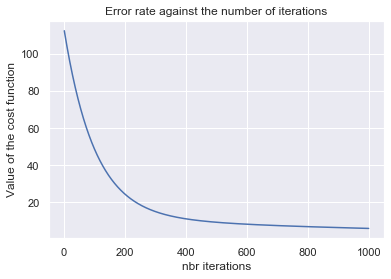

In [534]:
plt.figure()
plt.plot(np.arange(1,iters+1), cost2_history)
plt.title('Error rate against the number of iterations')
plt.xlabel('nbr iterations')
plt.ylabel('Value of the cost function')

In [541]:
print(weights)

[[ 4.53780068]
 [ 3.57136845]
 [ 0.96012255]
 [14.00564707]]


In [542]:
w1_without = weights[0][0]
w2_without = weights[1][0]
w3_without = weights[2][0]
bias_without = weights[3][0]

## Multivariable linear regression (with tensorflow)

In [375]:
features.head()

TV     radio  newspaper  bias
0  0.280884  0.293065   0.339894   1.0
1 -0.346779  0.323306   0.127933   1.0
2 -0.439102  0.456371   0.340774   1.0
3  0.015074  0.363629   0.245787   1.0
4  0.114161 -0.251290   0.244908   1.0

### Preprocessing the data

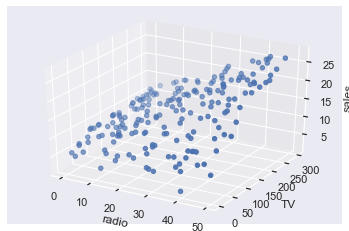

In [371]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data_full['sales']
xdata = data_full['radio']
ydata = data_full['TV']
ax.scatter3D(xdata, ydata, zdata, cmap='rainbow');

ax.set_xlabel('radio')
ax.set_ylabel('TV')
ax.set_zlabel('sales');

#ax.view_init(45, 45)
#, c=zdata

### Reshaping the data

In [543]:
D = np.matrix(X_train.values)
T = np.matrix(y_train.values)
X_data = D[:,0:4].transpose()
y_data = T[0,:]

n = 4

print(X_data.shape)
print(y_data.shape)

(4, 160)
(1, 160)


### Creation of the model using TensorFlow

In [551]:
D = np.matrix(X_train.values)
T = np.matrix(y_train.values)
X_data = D[:,0:4].transpose()
y_data = T[0,:]
print(X_data.shape)

tf.reset_default_graph()
epochs = 2000

# Let's define the placeholders
x = tf.placeholder(tf.float32, shape=X_data.shape)
print(x)
y = tf.placeholder(tf.float32, shape=y_data.shape)

# Then the trainable variables
w = tf.get_variable('New_weights', shape=(1, 4))

# Define the model output
y_predicted = tf.matmul(w,x)

#Define the loss function
L = tf.reduce_sum((y_predicted - y)**2)

loss_record = []
epoch_record = []
weights_record = []

init = tf.global_variables_initializer()

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0005).minimize(L)

(4, 160)
Tensor("Placeholder:0", shape=(4, 160), dtype=float32)


### Training the model

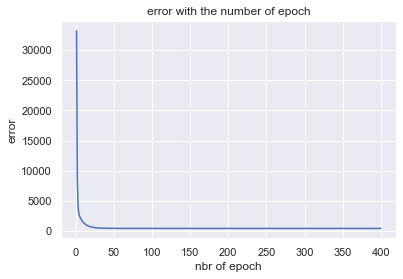

In [552]:
with tf.Session() as sesh:
    # Every operation, assignement we made earlier, will be done in the session
    sesh.run(init) # By creating a session, we create a pointer. Here that point to init and that will run it --> Here we initialize the variable
    
    for epoch in range(epochs):
        #current_loss = sesh.run(L, feed_dict={x: X_data,y: y_data})
        _, current_loss, current_w = sesh.run([optimizer, L, w], feed_dict={x: X_data,y: y_data})
        
        if epoch%5 == 0:
            loss_record.append(current_loss)
            epoch_record.append(epoch)
    
    plt.figure()
    plt.plot(np.arange(1,len(loss_record)+1), loss_record)
    plt.title('error with the number of epoch')
    plt.xlabel('nbr of epoch')
    plt.ylabel('error')
    plt.show()
   

In [553]:
print(current_w)

[[13.226557    9.383993    0.27794397 14.0999975 ]]


In [554]:
w1_with = current_w[0][0]
w2_with = current_w[0][1]
w3_with = current_w[0][2]
bias_with = current_w[0][3]

## Comparaison of the two models (with&without TF)
### Normalization of X_test
To use the weights previously calculated, we need to apply the exact same transformation we used. That's why we created the dataframe "df_info" that contains the mean, min and max values of each of the X_train columns.

In [587]:
df_info

TV      radio   newspaper
mean  150.019375  22.875625   29.945625
min     0.700000   0.000000    0.300000
max   296.400000  49.600000  100.900000

In [606]:
for col in X_test:
    X_test[col] -= df_info.loc['mean'][col]
    X_test[col] /= (df_info.loc['max'][col] - df_info.loc['min'][col])
bias_test = np.ones(shape=(len(X_test),1))
X_test['bias'] = bias_test
X_test

C:\Users\foucardguimax\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\foucardguimax\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\foucardguimax\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

TV     radio  newspaper  bias
95   0.044912  0.175895   0.228175   1.0
15   0.153468  0.500491   0.228175   1.0
30   0.483195  0.109362   0.131753   1.0
158 -0.467769  0.282749   0.151634   1.0
128  0.237675  0.526701  -0.265861   1.0
115 -0.253363  0.244443   0.226187   1.0
69   0.225839  0.423879  -0.027292   1.0
170 -0.338246 -0.227331  -0.114768   1.0
174  0.244777 -0.392654  -0.167452   1.0
45   0.084818 -0.007573   0.015451   1.0
66  -0.400810  0.034766  -0.275801   1.0
182 -0.317279 -0.346283  -0.002442   1.0
165  0.285697 -0.392654   0.545272   1.0
78  -0.489075  0.141620  -0.204231   1.0
186 -0.035574 -0.418863  -0.033257   1.0
177  0.068247 -0.303944   0.052230   1.0
56  -0.482649  0.105330   0.113861   1.0
152  0.160908  0.008556  -0.156517   1.0
82  -0.252686 -0.051928   0.025391   1.0
68   0.295504  0.093233  -0.188326   1.0
124  0.268788  0.190008   0.439904   1.0
16  -0.278050  0.276701   0.835531   1.0
148 -0.378828  0.351298  -0.179380   1.0
93   0.341159  0.274685   0.421018   1.0
65  -0.273992 -0.273702  -0.288724   1.0
60  -0.326410 -0.420880  -0.084947   1.0
84   0.214679  0.405733   0.038314   1.0
67  -0.036251 -0.168863  -0.196279   1.0
125 -0.212443 -0.223299  -0.040215   1.0
132 -0.478929  0.087185  -0.276795   1.0
9    0.168348 -0.408783  -0.086935   1.0
18  -0.273315 -0.047896  -0.115762   1.0
55   0.165305  0.534766   0.298751   1.0
75  -0.450184  0.419846   0.590998   1.0
150  0.441937 -0.180960   0.070123   1.0
104  0.298210  0.230330  -0.244986   1.0
135 -0.343995  0.486379  -0.213177   1.0
137  0.418264  0.121459   0.295769   1.0
164 -0.110989 -0.164831  -0.243992   1.0
76  -0.414337 -0.428944  -0.091905   1.0

### Calculating the predictions
"ypred_without" is the prediction **made without** the use of TensorFlow.

"ypred_with" is the prediction **made with** the use of TensorFlow.

In [607]:
ypred_without = w1_without*X_test['TV'] + w2_without*X_test['radio'] + w3_without*X_test['newspaper'] + bias_without*X_test['bias']
ypred_with = w1_with*X_test['TV'] + w2_with*X_test['radio'] + w3_with*X_test['newspaper'] + bias_with*X_test['bias']

### R² score of our models

In [608]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred_without)

0.5145892132466462

In [609]:
r2_score(y_test, ypred_with)

0.8994376230097245

As it can be seen above, the model made with the use of TensorFlow gives better results at estimating the "sales" given the amount of money spent by company on add. The score obtained is 0.9 which is not bad at all given the very simple model we created here.

In [610]:
data_test = pd.DataFrame(X_test)
data_test['y_test'] = y_test
data_test['ypred_without'] = ypred_without
data_test['ypred_with'] = ypred_with
data_test

TV     radio  newspaper  bias  y_test  ypred_without  ypred_with
95   0.044912  0.175895   0.228175   1.0    16.9      15.056711   16.408049
15   0.153468  0.500491   0.228175   1.0    22.4      16.708571   20.889885
30   0.483195  0.109362   0.131753   1.0    21.4      16.715360   21.553874
158 -0.467769  0.282749   0.151634   1.0     7.3      13.038393   10.608486
128  0.237675  0.526701  -0.265861   1.0    24.7      16.709955   22.112290
115 -0.253363  0.244443   0.226187   1.0    12.6      13.946100   13.105599
69   0.225839  0.423879  -0.027292   1.0    22.3      16.518082   21.057159
170 -0.338246 -0.227331  -0.114768   1.0     8.4      11.548679    7.460993
174  0.244777 -0.392654  -0.167452   1.0    11.5      13.553312   13.606355
45   0.084818 -0.007573   0.015451   1.0    14.9      14.378322   15.155074
66  -0.400810  0.034766  -0.275801   1.0     9.5      12.046211    9.048251
182 -0.317279 -0.346283  -0.002442   1.0     8.7      11.326851    6.653296
165  0.285697 -0.392654   0.545272   1.0    11.9      14.423300   14.345681
78  -0.489075  0.141620  -0.204231   1.0     5.3      12.096016    8.903425
186 -0.035574 -0.418863  -0.033257   1.0    10.3      12.316371    9.689615
177  0.068247 -0.303944   0.052230   1.0    11.7      13.279990   12.164978
56  -0.482649  0.105330   0.113861   1.0     5.5      12.300974    8.736274
152  0.160908  0.008556  -0.156517   1.0    16.6      14.616098   16.265048
82  -0.252686 -0.051928   0.025391   1.0    11.3      12.697932   10.277592
68   0.295504  0.093233  -0.188326   1.0    18.9      15.498741   18.831059
124  0.268788  0.190008   0.439904   1.0    19.7      16.326303   19.560436
16  -0.278050  0.276701   0.835531   1.0    12.5      14.534325   13.251146
148 -0.378828  0.351298  -0.179380   1.0    10.9      13.368990   12.336130
93   0.341159  0.274685   0.421018   1.0    22.2      16.938987   21.307014
65  -0.273992 -0.273702  -0.288724   1.0     9.3      11.507625    7.827362
60  -0.326410 -0.420880  -0.084947   1.0     8.1      10.939789    5.809579
84   0.214679  0.405733   0.038314   1.0    21.7      16.465628   20.757512
67  -0.036251 -0.168863  -0.196279   1.0    13.4      13.049623   11.981356
125 -0.212443 -0.223299  -0.040215   1.0    10.6      12.205529    9.183496
132 -0.478929  0.087185  -0.276795   1.0     5.7      11.877974    8.506622
9    0.168348 -0.408783  -0.086935   1.0    10.6      13.226197   12.466490
18  -0.273315 -0.047896  -0.115762   1.0    11.3      12.483198   10.003348
55   0.165305  0.534766   0.298751   1.0    23.7      16.952450   21.387684
75  -0.450184  0.419846   0.590998   1.0     8.7      14.029658   12.249714
150  0.441937 -0.180960   0.070123   1.0    16.1      15.432118   18.266657
104  0.298210  0.230330  -0.244986   1.0    20.7      15.946240   20.137610
135 -0.343995  0.486379  -0.213177   1.0    11.6      13.977026   14.055047
137  0.418264  0.121459   0.295769   1.0    20.8      16.621395   20.854168
164 -0.110989 -0.164831  -0.243992   1.0    11.9      12.679067   11.017408
76  -0.414337 -0.428944  -0.091905   1.0     6.9      10.505312    4.568997